![](https://cdn.tollywood.net/wp-content/uploads/2022/01/IMDB-Most-Anticipated-Indian-Movies-of-2022.jpg)

# Indian Movies listed on IMDb

Watching movies is one of the top most recreational activities among and its quiet popular among Indian Millennial as well as Gen-Z. With so many movies releasing every weekend in India, one needs to make a choice on what movies they can watch and most of us refers to IMDb to find out a movie of our choice which they either go to cinemas or enjoy from the comfort of their living room's couch.

IMDb is a reliable database for movies as it contains a lot of information ranging from cast, crew, plot, ratings and many more.

The dataset contains 10000 rows and 8 columns, starting from Title of the movie, release date ans so on to the last column having user ratings.

The Dataset is available on Kaggle and the codes as well as methodology applied here were learnt from [Data Analysis with Python: Zero to Pandas](zerotopandas.com) on Jovian Platform.


Multiple Python Libraries were used while working on this project as listed below:
* __Pandas__
* __NumPy__
* __Matplotlib__
* __Seaborn__

## Downloading the Dataset using _Opendataset_ Python Library

First _Opendataset_ Python library is installed, this library is used for downloading datasets from external platforms like, "Kaggle" in our case.

Once done, file is downloaded from Kaggle which is in CSV format.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/kabhishm/imdb-10000-indian-movies' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: facile
Your Kaggle Key: ········


100%|██████████| 803k/803k [00:00<00:00, 64.5MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './imdb-10000-indian-movies'

In [5]:
import os
os.listdir(data_dir)

['IMDB_10000.csv']

File downloaded and uploaded using _Opendataset_ Python library, now following commands will save as well as upload current progress to Jovian.

In [6]:
project_name = "10000-indian-movies-listed-on-imdb"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "himal-pant/10000-indian-movies-listed-on-imdb" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/himal-pant/10000-indian-movies-listed-on-imdb


'https://jovian.com/himal-pant/10000-indian-movies-listed-on-imdb'

## Downloading and Importing Python Libraries

First we need to download and import libraries as their alias name. These libraries will help us in analysis of data

In [10]:
!pip install matplotlib --upgrade --quiet

In [11]:
!pip install seaborn --upgrade --quiet

In [12]:
!pip install wordcloud --upgrade --quiet

In [13]:
import numpy as np
import pandas as pd

## Data Preparation and Cleaning

We will prepare the data for performing analysis by checking empty values , which are denoted by "NaN" within the CSV file.

Once empty values are omitted we will update column headings to proper case and will keep the relevant columns in the data frame.

### Steps taken in the following code cells are mentioned below:
>    * File Uploaded to database
>    * Null values checked
>    * New Database created with 6 columns out of 8
>    * Null values removed from the dataset
>    * Columns name updated as per proper case
>    * Leading and Trailing white spaces removed from the Date column
>    * Date column data type updated

Further details are mentioned next to the respective cells.

In [14]:
# to read csv file

d=pd.read_csv('./imdb-10000-indian-movies/IMDB_10000.csv')

In [15]:
# 5 Random rows from the dataset
d.sample(5)

,title,year,certificate,runtime,genre,desc,rating,votes
5267,Jatugriha,2022,UA,104 min,"Drama, Horror",Shivaraj falls in love with his manager's daug...,7.8,555
4324,Dhol,2007,UA,145 min,"Comedy, Crime, Mystery","Josemon, a young man from Kerala meets Cathy, ...",6.4,"1,660"
7300,Jamna Pyari,2015,NaN,125 min,"Comedy, Drama","A young man with a PhD can't get a job, so he ...",5.9,54
4416,Arjun Patiala,2019,UA,107 min,"Action, Comedy",A lady who has been through many ups and downs...,7.4,177
9632,Oops!,2003,A,109 min,"Comedy, Drama",NaN,NaN,NaN


We can observe from the above sample data that there are 8 columns in our datasets also out of 5 random rows we've having few  empty elements additionally column headings are in lower case.

To verify the number of rows and column of the data we will use ___"Shape"___ method.

In [16]:
d.shape

(10000, 8)

### i. Handling Missing Data

There are 1000 rows and 8 columns in the file.

First we will check the number of empty values, using ___"isna"___ and ___"sum"___ method.

___"isna"___ will check if there are any empty values and "sum" method will add all the empty values from respective columns.


In [17]:
d.isnull().sum()

title             0
year            264
certificate    3440
runtime        2062
genre           133
desc           1041
rating         1041
votes          1041
dtype: int64

There are lot of empty values in all the column expect title. Maximum number of empty rows are in Certificate column. In order to clean the data we will remove all the empty rows using "dropna" method.

Before removing the empty values we will remove columns: desc & votes.

Desc column is a string with synopsis of movie, while we already have genre column which defines movie in one or couple of words.

Votes column is almost similar to rating column hence we will keep the the rating column.

In [18]:
#new data frame created with 6 out of 8 columns
film_df=d[['title','year','certificate','runtime','genre','rating']]

In [19]:
df_film=film_df.dropna()

In [20]:
#returns the number of empty values in each column
df_film.isna().sum()

title          0
year           0
certificate    0
runtime        0
genre          0
rating         0
dtype: int64

All empty values removed from the newly created dataset having 6 columns.

In [21]:
# returns 10 sample rows
df_film.sample(10)

,title,year,certificate,runtime,genre,rating
5989,Vaayai Moodi Pesavum,2014,U,140 min,"Comedy, Drama, Romance",6.8
391,English Vinglish,2012,U,134 min,"Comedy, Drama, Family",9.0
4620,Ghulam-E-Musthafa,1997,A,162 min,"Action, Crime, Drama",7.0
3984,Lakshmi,2014,A,115 min,Drama,6.7
2959,Roberrt,2021,UA,166 min,"Action, Comedy, Musical",6.6
2572,Aaja Nachle,2007,U,137 min,"Drama, Family, Music",4.5
3897,Divaswapna,2021,U,130 min,Drama,6.6
5358,Ardh,2022,UA,84 min,"Drama, Romance",9.0
1132,Raaz Reboot,2016,A,128 min,"Horror, Mystery, Romance",7.3
7061,Shaitani Ilaaka,1990,A,128 min,Horror,7.7


In [22]:
#returns the number of rows and columns
df_film.shape

(5440, 6)

### ii. Updating Column names and data types

___Shape___ method confirms that there are only 6 columns left and 5440 rows in total, as we removed rows having empty values.


In [23]:
#renaming columns
df_film.columns=['Title','Year','Certificate','Runtime','Genre','Rating']

In [24]:
# resets the index to 0 and then start index value from 1
df_film.reset_index(drop=True,inplace=True)
df_film.index=df_film.index+1

In [25]:
# returns concise summary of the dataframe
df_film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 1 to 5440
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        5440 non-null   object 
 1   Year         5440 non-null   object 
 2   Certificate  5440 non-null   object 
 3   Runtime      5440 non-null   object 
 4   Genre        5440 non-null   object 
 5   Rating       5440 non-null   float64
dtypes: float64(1), object(5)
memory usage: 255.1+ KB


There are no empty values, all the columns are having object data type except Ratings as it contains decimal values and is having float datatype.

In [26]:
df_film.sample(10)

,Title,Year,Certificate,Runtime,Genre,Rating
800,Manmarziyaan,2018,UA,156 min,"Comedy, Drama, Romance",5.6
3277,Jiivi,2019,U,122 min,"Drama, Thriller",7.7
3897,Borderlands,2021,U,67 min,Documentary,4.8
5322,Kaleerein,2018,UA,20 min,"Drama, Romance",8.1
3658,Kuttrame Thandanai,2016,UA,100 min,"Crime, Drama, Mystery",5.7
5040,Munda Hi Chahida,2019,UA,130 min,"Comedy, Drama",8.0
5356,Celluloid,2013,U,129 min,"Biography, Drama",8.4
4996,F.I.R NO. 339/07/06,2021,U,146 min,"Crime, Drama, Thriller",8.2
4921,Samurai,2002,U,140 min,"Action, Drama, Musical",8.6
4231,Bade Ghar Ki Beti,1989,U,138 min,Drama,7.7


>On observing the Year column we found that there are non numeric values. These values can be checked from the data set using "___isnumeric___" method.
>Additionally we will remove both leading and trailing whitespace from Year column with the help of ___strip___ method.

In [27]:
#removes leading and trailing whitespaces
df_film['Year'].str.strip()

1            2022
2            2022
3            2022
4           2022–
5            2022
          ...    
5436    2010–2021
5437    2020–2021
5438         2021
5439    2018–2021
5440         2019
Name: Year, Length: 5440, dtype: object

In [28]:
# checks for any non numeric value in Years column
df_film.Year.str.isnumeric()

1        True
2        True
3        True
4       False
5        True
        ...  
5436    False
5437    False
5438     True
5439    False
5440     True
Name: Year, Length: 5440, dtype: bool

>The aforementioned code shows that there are non-numeric values. 

We will create a new dataframe having only numeric values within Year column and change the object to int type as Year is a numeric value.

In [29]:
# creates a new database with only numeric values in Years column
films_df=df_film[df_film.Year.apply(lambda x: x.isnumeric())]

In [30]:
# changes datat tyep for Year column to int
films_df=films_df.astype({'Year':'int'})

In [31]:
# resets the index to 0
films_df.reset_index(drop=True,inplace=True)

In [32]:
#increases the index count by 1, making 1 as the index for first element and counting
films_df.index=films_df.index+1

In [33]:
#returns first 10 values of newly created data frame
films_df.head(10)

,Title,Year,Certificate,Runtime,Genre,Rating
1,Freddy,2022,UA 16+,124 min,"Drama, Mystery, Thriller",7.9
2,An Action Hero,2022,U,130 min,Action,8.1
3,Kantara,2022,UA,148 min,"Action, Adventure, Drama",8.7
4,Drishyam 2,2022,UA,140 min,"Crime, Drama, Mystery",8.6
5,Qala,2022,UA 16+,119 min,"Drama, History, Music",7.2
6,Bhediya,2022,UA,156 min,"Comedy, Horror, Thriller",7.7
7,RRR (Rise Roar Revolt),2022,UA,187 min,"Action, Drama",8.0
8,India Lockdown,2022,UA,117 min,Drama,8.7
9,Office Christmas Party,2016,R,105 min,Comedy,5.9
10,Chup,2022,A,135 min,"Drama, Romance, Thriller",7.9


In [34]:
films_df.Certificate.unique()

array(['UA 16+', 'U', 'UA', 'R', 'A', '18', 'UA 13+', '13', 'PG', '16',
       'PG-13', '12+', '15+', 'Unrated', 'UA 7+', '16+', 'Not Rated', '7',
       '(Banned)', 'All', 'U/A', '7+', 'G'], dtype=object)

As per the official website of Censor Board of India there are 4 categories in which movies are certified viz. U, U/A, A & S

>* __U__- Movies fit for all kind of audiences.
>* __U/A__ - Children under 12 can watch under parental guidance, having slightly mature themes.
>* __A__- Movies for 18+ Audiences.
>* __S__- Not for public release only for Doctors, Scientists, Research etc. purposes.

We have more than 20 category of Certificates in our Database and will try to fit them in U,U/A or A category, unless its Banned or Not Rated.

>__P.S.__ :- S rated movies are not released for general audiences and such movies are not part of this dataset.

In [35]:
films_df=films_df.replace({'Certificate':{'R':'A','UA':'U/A','UA 16+':'U/A','18':'A','UA 13+':'U/A','PG':'U/A','16':'U/A','PG-13':'U/A','12+':'U/A','15+':'U/A','UA 7+':'U/A','13':'U/A','16+':'U/A','7':'U','All':'U','7+':'U','G':'U','Not Rated':'Unrated'}})

In [36]:
#Certificate name after renaming
films_df.Certificate.unique()

array(['U/A', 'U', 'A', 'Unrated', '(Banned)'], dtype=object)

In [37]:
#sample 10 rows
films_df.sample(10)

,Title,Year,Certificate,Runtime,Genre,Rating
3109,Bachelors,2022,U/A,98 min,"Mystery, Thriller",7.0
4557,Soothrakkaran,2019,U,147 min,"Family, Thriller",6.4
470,Toilet - Ek Prem Katha,2017,U/A,155 min,"Comedy, Drama, Romance",6.6
2322,Rathinirvedam,1978,A,124 min,"Drama, Romance",7.4
1196,Bose: Dead/Alive,2017,A,20 min,"Biography, History, Mystery",6.5
4231,Singh vs. Kaur,2013,U,149 min,Comedy,8.1
2155,Lal Jose,2022,U,120 min,Drama,6.3
754,Bhoothakaalam,2022,U/A,105 min,"Drama, Horror, Mystery",5.7
2623,Velaiilla Pattadhari,2014,U,133 min,"Action, Comedy, Drama",7.7
1742,Aaraattu,2022,U,167 min,"Action, Drama",9.0


In [38]:
films_df['Runtime'].dtype

dtype('O')

Runtime column which tells the length of movie is currently present as Object data type, we will convert it into integer data type.

Numerical value is followed by the suffix  ___"mins"___ having a space in between.
>
>    * We will use this space as a ___"delimiter"___ to separate the column into two more columns.
>    * After the columns are separated we will update the numerical column to ___int___ data type.
>    * Once the correct column data type is updated, we will remove the redundant columns from the data frame using ***del***.

In [39]:
# splitting columns using lambda functions
films_df[['Runtime (in mins)','Redun']] = films_df["Runtime"].apply(lambda x: pd.Series(str(x).split(" ")))

In [40]:
films_df

,Title,Year,Certificate,Runtime,Genre,Rating,Runtime (in mins),Redun
1,Freddy,2022,U/A,124 min,"Drama, Mystery, Thriller",7.9,124,min
2,An Action Hero,2022,U,130 min,Action,8.1,130,min
3,Kantara,2022,U/A,148 min,"Action, Adventure, Drama",8.7,148,min
4,Drishyam 2,2022,U/A,140 min,"Crime, Drama, Mystery",8.6,140,min
5,Qala,2022,U/A,119 min,"Drama, History, Music",7.2,119,min
...,...,...,...,...,...,...,...,...
4599,Mala Kahich Problem Nahi,2017,U/A,134 min,Drama,3.8,134,min
4600,Shikhar,2005,U,162 min,Drama,2.8,162,min
4601,Sexy Durga,2017,U/A,85 min,"Drama, Fantasy, Horror",3.1,85,min
4602,Aakashavaani,2021,U/A,124 min,Drama,5.5,124,min


In [41]:
del films_df['Redun']

In [42]:
films_df = films_df.astype({'Runtime (in mins)':'int'})

In [43]:
films_df['Runtime (in mins)'].dtype

dtype('int64')

In [44]:
del films_df['Runtime']

In [45]:
films_df

,Title,Year,Certificate,Genre,Rating,Runtime (in mins)
1,Freddy,2022,U/A,"Drama, Mystery, Thriller",7.9,124
2,An Action Hero,2022,U,Action,8.1,130
3,Kantara,2022,U/A,"Action, Adventure, Drama",8.7,148
4,Drishyam 2,2022,U/A,"Crime, Drama, Mystery",8.6,140
5,Qala,2022,U/A,"Drama, History, Music",7.2,119
...,...,...,...,...,...,...
4599,Mala Kahich Problem Nahi,2017,U/A,Drama,3.8,134
4600,Shikhar,2005,U,Drama,2.8,162
4601,Sexy Durga,2017,U/A,"Drama, Fantasy, Horror",3.1,85
4602,Aakashavaani,2021,U/A,Drama,5.5,124


### iii. Data Exploration
We have modified the columns of the dataset, no we'll explore them using the following methods:

>* __Describe()__- It will return the basic statistical information of all the numerical columns viz. count, mean, min, max etc.
>* __Shape__ - It will return the dimension of the dataset, i.e. number of rows and columns.
>* __Info()__- It will give a brief of complete dataset.

In [46]:
films_df.describe().round(0)

,Year,Rating,Runtime (in mins)
count,4603.0,4603.0,4603.0
mean,2010.0,7.0,137.0
std,15.0,2.0,26.0
min,1938.0,1.0,5.0
25%,2005.0,6.0,122.0
50%,2016.0,7.0,138.0
75%,2020.0,8.0,153.0
max,2023.0,10.0,418.0


In [47]:
films_df.shape

(4603, 6)

In [48]:
films_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4603 entries, 1 to 4603
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              4603 non-null   object 
 1   Year               4603 non-null   int64  
 2   Certificate        4603 non-null   object 
 3   Genre              4603 non-null   object 
 4   Rating             4603 non-null   float64
 5   Runtime (in mins)  4603 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 215.9+ KB


In [49]:
import jovian

In [50]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "himal-pant/10000-indian-movies-listed-on-imdb" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/himal-pant/10000-indian-movies-listed-on-imdb


'https://jovian.com/himal-pant/10000-indian-movies-listed-on-imdb'

## Exploratory Analysis and Visualization

We're using Line Charts, Pie Charts, Bar charts and few others to analyze the data set.

> In exploratory analysis, we've used ***matplotlib*** and ***seaborn*** for plotting graphs/charts along with ***numpy*** as well as ***pandas*** libraries of Python.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [51]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### i. Exploratory analysis of Data with Line Chart

> * Line chart for Relationship between Movie Runtime and Time Period (range: 10 Years).
> * Line chart between Movie Ratings over the Range of Time.
> * Line chart for Number of movies released per year.

In [52]:
films_df.groupby('Year').size()

Year
1938      1
1946      1
1949      3
1951      4
1952      1
       ... 
2019    349
2020    189
2021    374
2022    645
2023      5
Length: 76, dtype: int64

There are 76 unique rows for Year column, we will create a group of yearly data.

>* Group will be created by dividing the number of years into equal number of intervals.
>* We have filtered the dataset by including Years between 1962 and 2022 (both inclusive), as there are less than 3 rows for years before 1962.
>* There will be 6 intervals each of 10 years.
>* Relationship between runtime as well as average movie rating is displayed on two different line charts.

In [53]:
film_df_period=films_df[(films_df['Year']>1962)&(films_df['Year']<2022)]

In [54]:
film_df_period.isna().sum()

Title                0
Year                 0
Certificate          0
Genre                0
Rating               0
Runtime (in mins)    0
dtype: int64

In [55]:
film_df_period.dropna()

,Title,Year,Certificate,Genre,Rating,Runtime (in mins)
9,Office Christmas Party,2016,A,Comedy,5.9,105
13,1917,2019,A,"Action, Drama, War",8.2,119
16,Ready Player One,2018,U/A,"Action, Adventure, Sci-Fi",7.4,140
24,The Help,2011,U/A,Drama,8.1,146
27,The Happening,2008,U/A,"Adventure, Drama, Sci-Fi",5.0,91
...,...,...,...,...,...,...
4599,Mala Kahich Problem Nahi,2017,U/A,Drama,3.8,134
4600,Shikhar,2005,U,Drama,2.8,162
4601,Sexy Durga,2017,U/A,"Drama, Fantasy, Horror",3.1,85
4602,Aakashavaani,2021,U/A,Drama,5.5,124


In [56]:
time_period = 10
first_year = 1962
last_year = 2022

year_range = last_year - first_year
modulo = year_range % time_period

In [57]:
f_start = last_year - time_period
f_end = last_year + 1

In [58]:
starts = np.arange(first_year, f_start, time_period).tolist()

In [59]:
tuples = [(start, start+time_period) for start in starts]

tuples.append(tuple([f_start, f_end]))
bins = pd.IntervalIndex.from_tuples(tuples, closed='left')

In [60]:
original_labels = list(bins.astype(str))
new_labels = ['{} - {}'.format(b.strip('[)').split(', ')[0], int(b.strip('[)').split(', ')[1])-1) for b in original_labels]
label_dict = dict(zip(original_labels, new_labels))

In [61]:
label_dict

{'[1962, 1972)': '1962 - 1971',
 '[1972, 1982)': '1972 - 1981',
 '[1982, 1992)': '1982 - 1991',
 '[1992, 2002)': '1992 - 2001',
 '[2002, 2012)': '2002 - 2011',
 '[2012, 2023)': '2012 - 2022'}

In [62]:
film_df_period['Time-Period'] = pd.cut(film_df_period['Year'], bins=bins, include_lowest=True, precision=0)
film_df_period['Time-Period'] = film_df_period['Time-Period'].astype("str")
film_df_period = film_df_period.replace(label_dict)

/tmp/ipykernel_38/2697312644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film_df_period['Time-Period'] = pd.cut(film_df_period['Year'], bins=bins, include_lowest=True, precision=0)
/tmp/ipykernel_38/2697312644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film_df_period['Time-Period'] = film_df_period['Time-Period'].astype("str")


In [63]:
film_df_period

,Title,Year,Certificate,Genre,Rating,Runtime (in mins),Time-Period
9,Office Christmas Party,2016,A,Comedy,5.9,105,2012 - 2022
13,1917,2019,A,"Action, Drama, War",8.2,119,2012 - 2022
16,Ready Player One,2018,U/A,"Action, Adventure, Sci-Fi",7.4,140,2012 - 2022
24,The Help,2011,U/A,Drama,8.1,146,2002 - 2011
27,The Happening,2008,U/A,"Adventure, Drama, Sci-Fi",5.0,91,2002 - 2011
...,...,...,...,...,...,...,...
4599,Mala Kahich Problem Nahi,2017,U/A,Drama,3.8,134,2012 - 2022
4600,Shikhar,2005,U,Drama,2.8,162,2002 - 2011
4601,Sexy Durga,2017,U/A,"Drama, Fantasy, Horror",3.1,85,2012 - 2022
4602,Aakashavaani,2021,U/A,Drama,5.5,124,2012 - 2022


In [64]:
film_df_year = film_df_period.groupby('Time-Period').mean().reset_index().drop('Year', axis=1)

In [65]:
film_df_year

,Time-Period,Rating,Runtime (in mins)
0,1962 - 1971,6.545192,150.163462
1,1972 - 1981,6.450327,143.758170
2,1982 - 1991,6.521973,151.677130
3,1992 - 2001,6.370133,153.096000
4,2002 - 2011,6.594452,142.988111
5,2012 - 2022,6.600000,131.255814


> Six Unique time intervals each of 10 years, prepared and now analysis and plotting will be performed with the help of these Time-Period ranges.

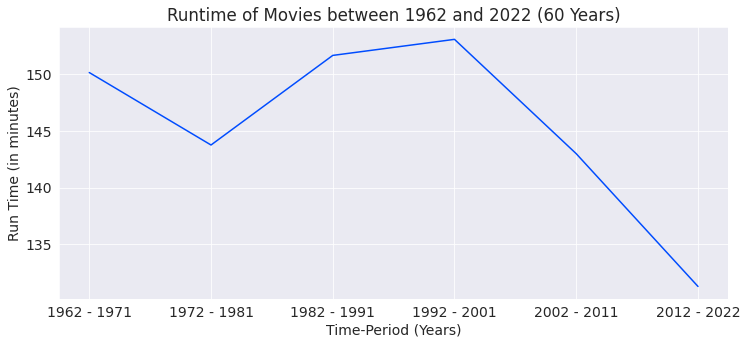

In [107]:
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(5)
fig.patch.set_facecolor('white')

plt.plot(film_df_year['Time-Period'], film_df_year['Runtime (in mins)'], color='#004cff')

plt.title("Runtime of Movies between 1962 and 2022 (60 Years)")
plt.xlabel("Time-Period (Years)") 
plt.ylabel("Run Time (in minutes)") 

plt.show()

> We can see that the Movie Run time kept on decreasing from 2000s onwards.

> * Initially movies were somewhere around 150 mins long, the average time decreased by 5 mins to 145 mins during 1970s.
> * This was followed by an 12-15 mins increase in movie time between 1982-2001.
> * In next 13 years the value further decreased by almost 20 mins and settled at average 135 mins.

> In a nutshell, from late 1950s to early 2000s average movie were about 150 odd minutes long, however the number drastically went down up to 130 mins from early 2000s onwards.

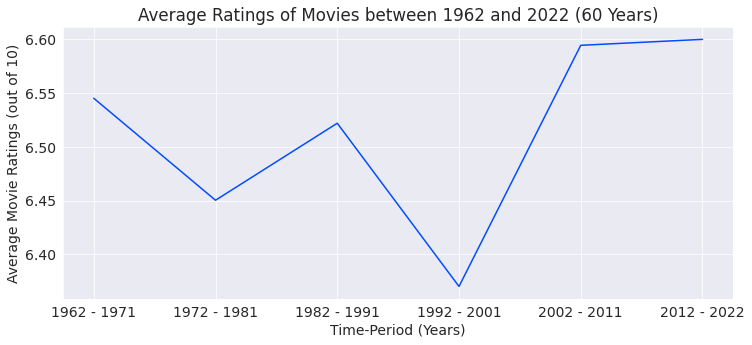

In [108]:
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(5)
fig.patch.set_facecolor('white')

plt.plot(film_df_year['Time-Period'], film_df_year['Rating'], color='#004cff')

plt.title("Average Ratings of Movies between 1962 and 2022 (60 Years)")
plt.xlabel("Time-Period (Years)") 
plt.ylabel("Average Movie Ratings (out of 10)") 

plt.show()

>Average movie rating is almost constant and varies by few decimals across the time period.
>Still we can see a sharp rise after 2001 and then value staying constant at around 6.60 for next 2 decades.
>Lowest average rating is for movies which were released between 1992 to 2001.

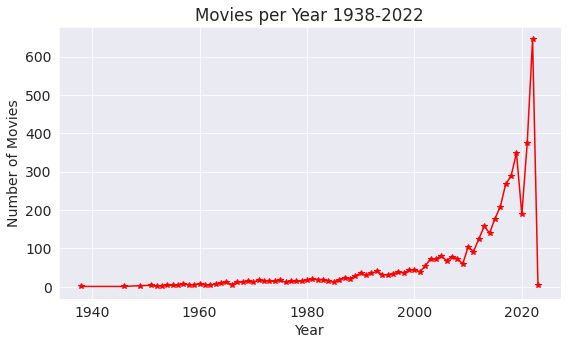

In [111]:
films_df.groupby('Year').size().plot(kind='line',title='Movies per Year 1938-2022',c='r',marker='*', xlabel='Year', ylabel='Number of Movies');

We can see that the number of movies released per decade as per the data set  kept on increasing.

>If we go by the trends it can conclude that count was increasing which drastically decreased in 2020. This be associated with Nation wide lockdown as film city and production houses were closed, and only essential services were functional during the first lockdown.

>Also, interesting to point out that the count of movies till early 1970s is way too less, compared to the count from 2000s onwards. This could be due to the cleaning of data as we removed around 3600 empty rows from the dataset and also that that dataset is skewed towards the later years, in order to get a more accurate insight we will create a new data frame where only movies from 21st century will be present.

In [69]:
millenium_df =films_df[(films_df['Year']>1999)&(films_df['Year']<2023)]

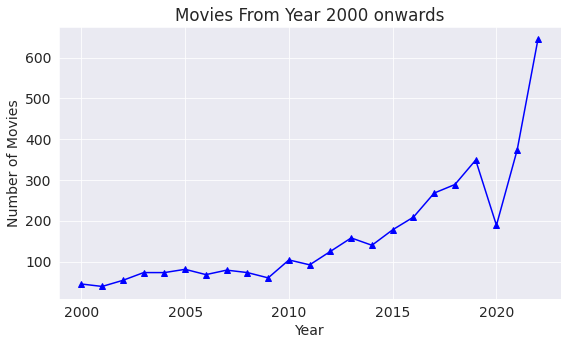

In [70]:
millenium_df.groupby('Year').size().plot(kind='line',xlabel='Year',ylabel='Number of Movies',title='Movies From Year 2000 onwards',c='b',marker='^');

The above line chart cements the previous analysis of drop in movies count during 2020 because of the Global Pandemic, and by next year the number of movies released was equivalent to pre-covid times, then in 2022 there was a massive jump of 300+ movies compared to previous year with a total tally of 600+ movies in one year.

### ii. Exploratory analysis of data with Bar Charts
> *  Number of Movie Certificates for each category via horizontal and vertical bar chart
> *  Number of movies certificates as a horizontal bar graph.
> *  Percentage of movie certificates as a total of all the certificates.

In [71]:
count=films_df['Certificate'].value_counts()

In [72]:
count

U/A         2020
U           1719
A            797
Unrated       48
(Banned)      19
Name: Certificate, dtype: int64

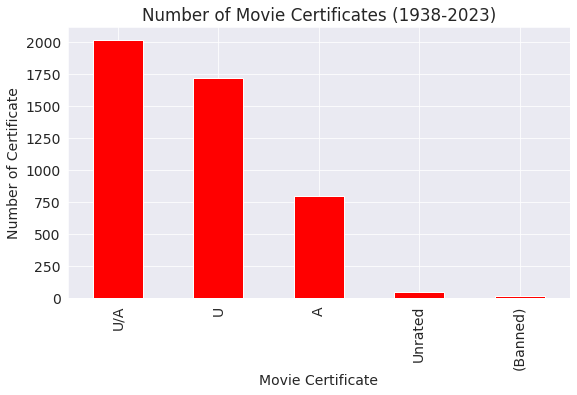

In [105]:
films_df['Certificate'].value_counts().plot(kind='bar',xlabel='Movie Certificate',ylabel='Number of Certificate',color='r', title='Number of Movie Certificates (1938-2023)');

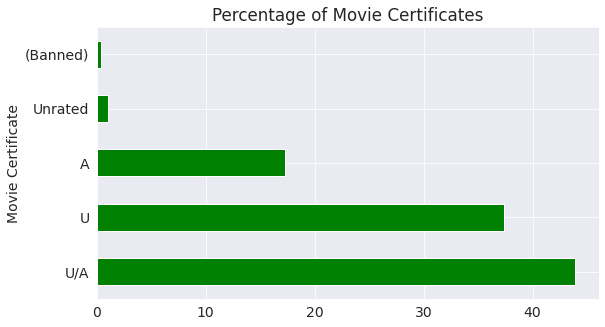

In [114]:
# Percentage of Certificates and horizontal bar chart

(films_df['Certificate'].value_counts(normalize=True)*100).plot(kind='barh',title='Percentage of Movie Certificates',ylabel='Movie Certificate',color='green');

> Almost 50% movies are rated U/A i.e. suitable for age 12+  followed by U movies which are open to all, not restricted to anyone.

>The Horizontal chart here shows the Percentage of a certificate with respect to the total certificates granted, for e.g.:- >15% of all the movies in the dataset are A certified.

In [75]:
sample_df_y=films_df[films_df['Year']==2018]

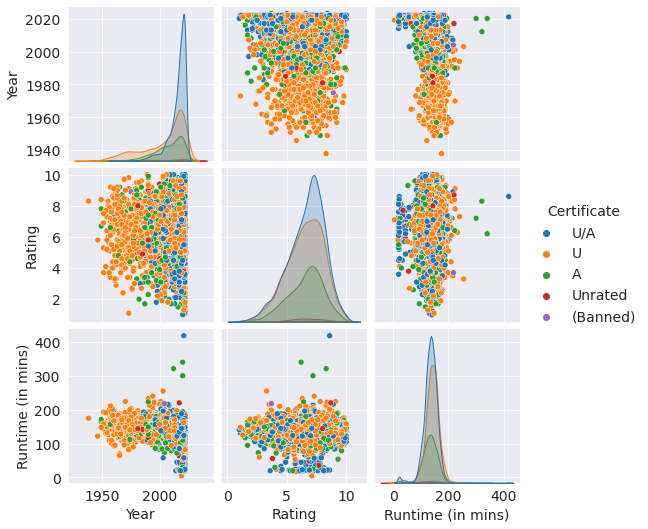

In [76]:
sns.pairplot(films_df,hue='Certificate');

The aforementioned charts provides a lot of information based on certification, run time, ratings and launch year.
We will perform analysis basis the above charts by creating subsets based on Release Year as most of the data seems to be from the later years.

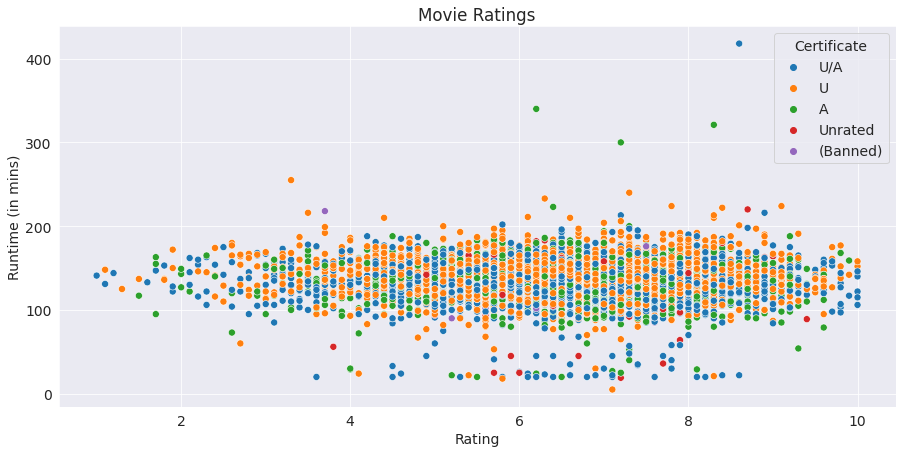

In [77]:
plt.figure(figsize=(15,7))
plt.title('Movie Ratings')

sns.scatterplot(y='Runtime (in mins)',
                x='Rating',
                hue='Certificate',
                s=50, 
                data=films_df);

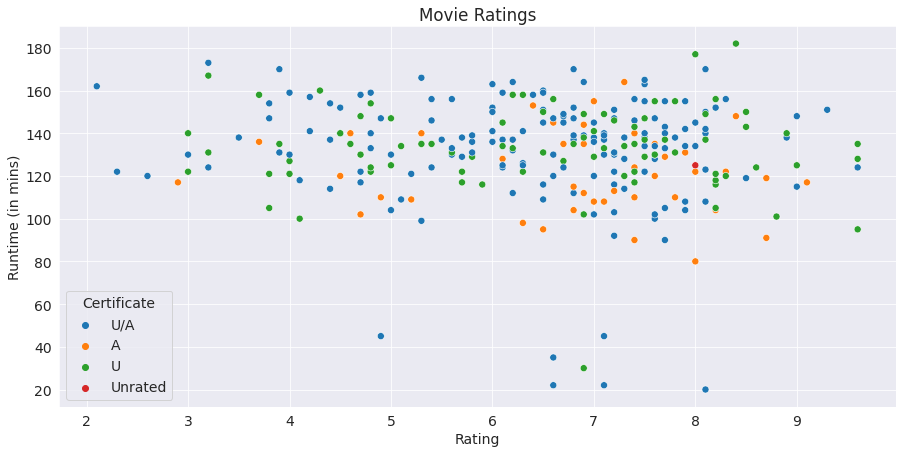

In [78]:
plt.figure(figsize=(15,7))
plt.title('Movie Ratings')

sns.scatterplot(y='Runtime (in mins)',
                x='Rating',
                hue='Certificate',
                s=50, 
                data=sample_df_y);

First scatter plot shows the relationship between Ratings and Runtime for the the complete dataset.
> * It tells that most of the movies lie between the range of 100 to 160 mins
> * Ratings are mostly between 4 to 8 which is very wide spread and not concentrated.

Second scatter plot tells us the same relationship only for the year 2018.
> * Length of most of the movies is around is between 110 to 150 mins.
> * Ratings is more widespread and majority of movies are having 3 to  8 rating points.

Let us dive deep into the relationship between ratings, movie length i.e runtime as well as other parameters in next section. 

Let us save and upload our work to Jovian before continuing

In [79]:
import jovian

In [80]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "himal-pant/10000-indian-movies-listed-on-imdb" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/himal-pant/10000-indian-movies-listed-on-imdb


'https://jovian.com/himal-pant/10000-indian-movies-listed-on-imdb'

## Asking and Answering Questions

Depth analysis of data set based on Certification, Runtime, Ratings etc.



#### Q1: How many certificates were granted to the movies in last five years? 

While going for a movies, majority of audience may not bother much about certification, meanwhile it makes a much of difference to movie makers and production houses.

Movie business depends upon box office performance, and more footfall is proportional to more revenue.

Movies where kids between 7-15 years are not allowed can put a dent on revenue cinema halls impacting producers as it may drastically decrease the probability of a family booking ticket for such movie on a fine weekend.

We will create a group based on can check the validity of this argument.

In [81]:
# Sample Data frame from year 2018 to 2022
sample_df_2018=films_df[films_df['Year']==2018]
sample_df_2019=films_df[films_df['Year']==2019]
sample_df_2020=films_df[films_df['Year']==2020]
sample_df_2021=films_df[films_df['Year']==2021]
sample_df_2022=films_df[films_df['Year']==2022]

These are 5 different databases created to perform statistical operation and for plotting graphs as well.

Also, a subset of database is created having all the info from last 5 years.

In [82]:
sample_df_5year=films_df[(films_df['Year']>2017)&(films_df['Year']<2023)]

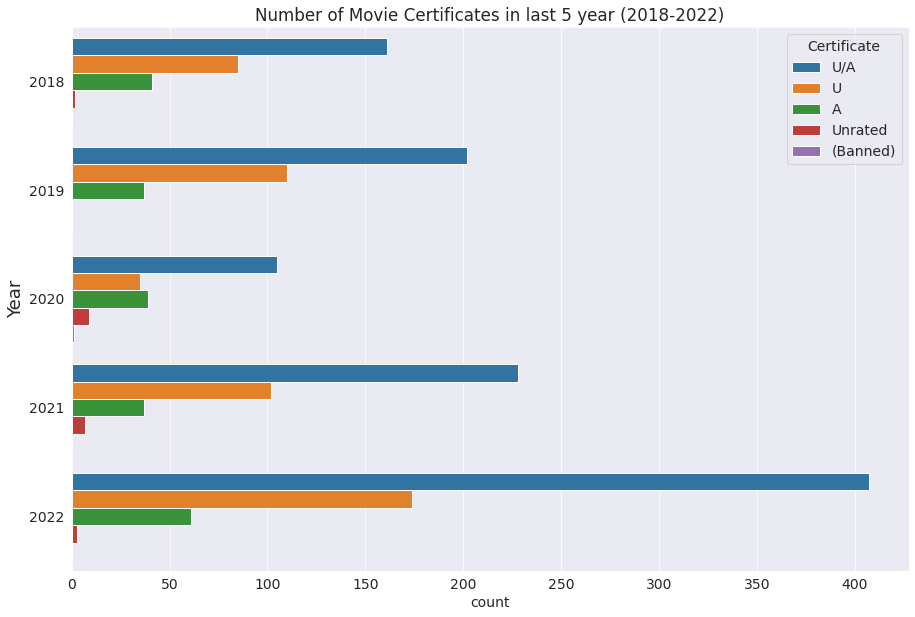

In [83]:
# Nunber of certificates given to movies in last 5 years

plt.figure(figsize=(15,10))

plt.ylabel('Year', fontsize=18)
plt.title('Number of Movie Certificates in last 5 year (2018-2022)')

sns.countplot(y='Year',hue='Certificate',data=sample_df_5year);

### Observation

> * A lot of movies were released in the last five years, maximum in 2022.
> * Majority of movies were U/A certificated.

#### Q2: Did the pandemic have any impact on film content??  Is it true that  content moderation is less relevant to producers post COVID, verify the claim?

With restricted movements due to lockdown , majority of work force across the nation were forced to work from home and resorted to digital platform when on a break.

Smartphones, Laptops, Smart TVs etc became our source of entertainment and production houses moved towards OTT players for launch of their product.

Unlike cinema halls there is no such restrictions when someone is watching content on digital platform all you need is a personal device and this gave cinema producers to work upon more sensitive and bold issues and audience also started accepting this for a sake of change from the usual content (content creators are required to put the certification at the beginning even on digital platforms.)

There were chinese whisper going around that content moderation is less relevant, will check the authenticity of this with help of bar charts.

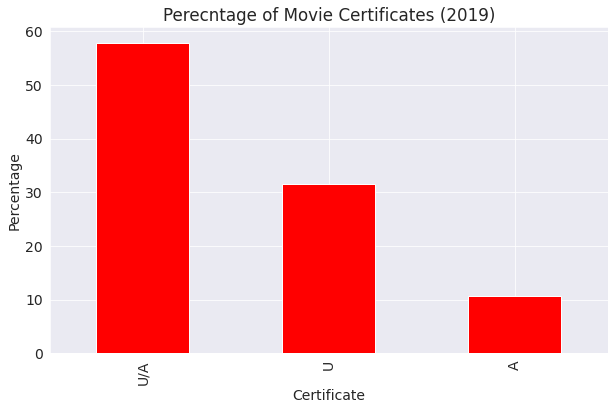

In [84]:
# Percentage of Movie Certificates before Pandemic

plt.figure(figsize=(10,6))

((sample_df_2019['Certificate'].value_counts(normalize=True))*100).plot(kind='bar',title='Perecntage of Movie Certificates (2019)',color='Red',ylabel='Percentage',xlabel='Certificate');

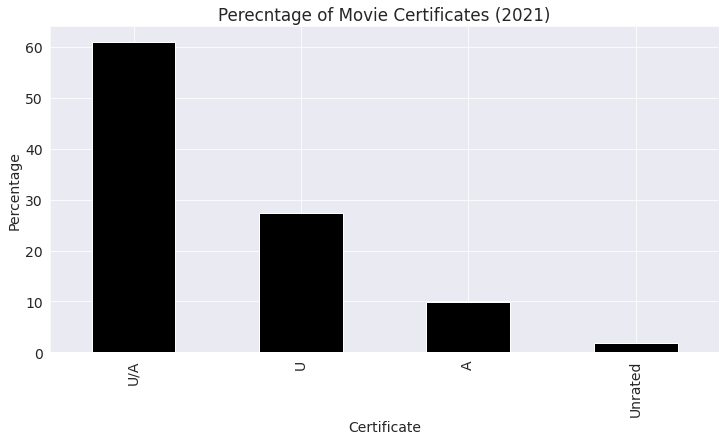

In [85]:
# Percentage of Movie Certificates after Pandemic

plt.figure(figsize=(12,6))

((sample_df_2021['Certificate'].value_counts(normalize=True))*100).plot(kind='bar',title='Perecntage of Movie Certificates (2021)',color='black',ylabel='Percentage',xlabel='Certificate');

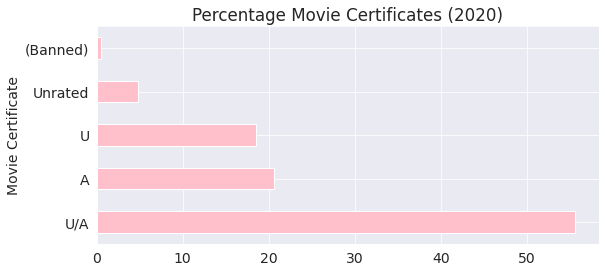

In [86]:
# Percentage of Movie Certificates during Pandemic

plt.figure(figsize=(9,4))

((sample_df_2020['Certificate'].value_counts(normalize=True))*100).plot(kind='barh',title='Percentage Movie Certificates (2020)',color='Pink',ylabel='Movie Certificate');

In [87]:
sample_df_2020.loc[sample_df_2020['Certificate']=='(Banned)']

,Title,Year,Certificate,Genre,Rating,Runtime (in mins)
1835,Gentleman,2020,(Banned),"Action, Drama, Mystery",7.6,144


As per Google search this is not a Banned movies hence updating the Certificate of this movie from (Banned) to U/A

In [88]:
sample_df_2020.at[1835,'Certificate']='U/A'

As the sample dataset is updated, below is the modified horizontal bar plot 

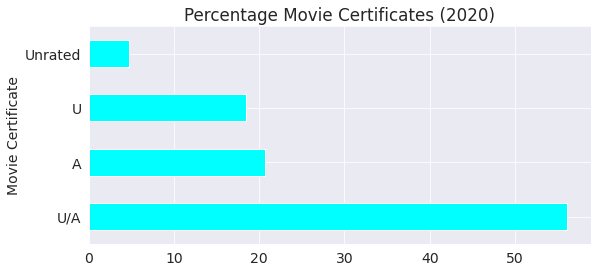

In [89]:
plt.figure(figsize=(9,4))

((sample_df_2020['Certificate'].value_counts(normalize=True))*100).plot(kind='barh',title='Percentage Movie Certificates (2020)',color='cyan',ylabel='Movie Certificate');

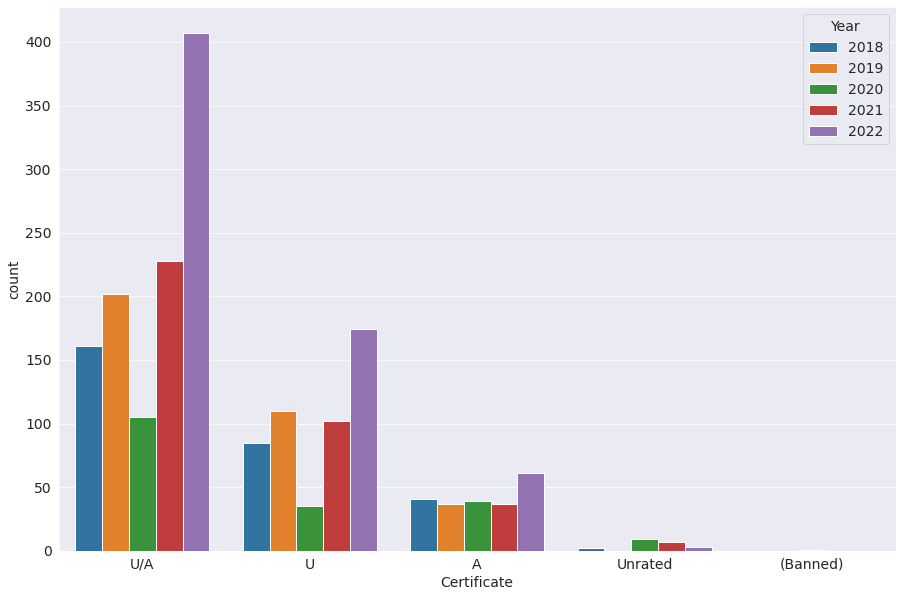

In [90]:
plt.figure(figsize=(15,10))

sns.countplot(x='Certificate',hue='Year',data=sample_df_5year);

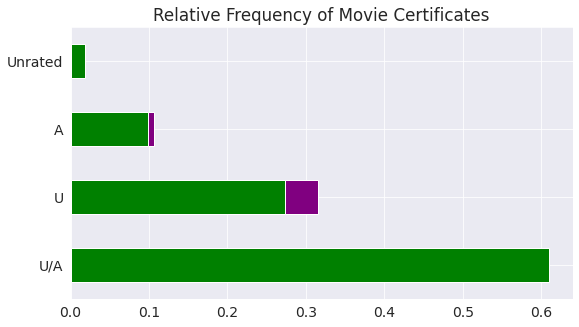

In [91]:
# Realtive Difference between the Certificates given to the movies before and after pandemic
sample_df_2019['Certificate'].value_counts(normalize=True).plot(kind='barh',title='Relative Frequency of Movie Certificates',color='purple');

sample_df_2021['Certificate'].value_counts(normalize=True).plot(kind='barh',title='Relative Frequency of Movie Certificates',color='green');

### Observation 

As per the four charts above we got the following information:

> * For all three years, **U/A** certification had more than ***50%*** of share, when compared to the rest of movie certification.
> * During 2019 there were no Unrated or Banned movies and **A** rated movies were hardly **12%** of the total movies.
    > * Around **57%** movies were **U/A** rated and remaining **31%** were **U** certified movies.
> * In 2020, there were more than **20%** movies which were **A** rated and **U/A** movies stood at somewhere between **55-57%**.
    > * Value of **U** movies went down from **31%** in 2019 to somewhere around **17%** in 2020, almost half.
    > * Even if the values of unrated movies are added to **U** movies for a reference it is still approximately **10%** less than its 2019 value.
> * Year 2021, **U/A** certified movies jumped above **60%**, U rated movies also gained traction and stood around **25%** while A rated movies came down to **10%**, lowest of the last three seasons.
    > * Around **2-3%** were **unrated** movies.
    
Based on the aforementioned brief it can be pointed that a lot more movies were granted A certificates in 2020, however this information should be taken with a pinch of salt:
    
* Number of movies released during 2020 was way less compared to those in 2019 and 2021.
* Even though we've considered percentage, the change in base value is  substantial, while the gap between A rated movies in 2019 and 2020 is hardly 8%
    
Hence, we can't say that content moderation was irrelevant to producers during pandemic.

#### Q3: Show maximum as well as minimum rating of movies in last 5 years.

With the advent of social media more and more people are open to provide their opinions on different topics and since the inception of cinema movies are being rated on the story line, performance and multiple other factors by critics and fellow movie goers.

Many movie goers depend on those ratings as it is a deciding factor, whether to watch a movie or not?

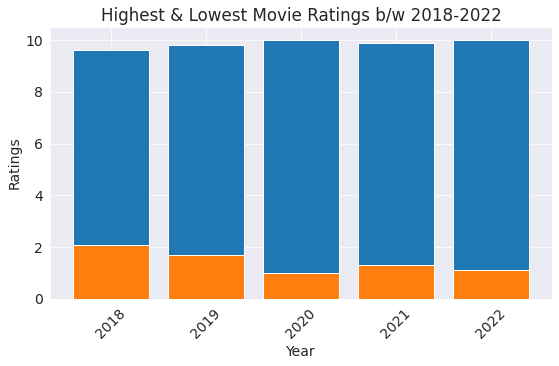

In [92]:
#Stacked Bar chart for max and minimum rating each year
Rating_Max=(sample_df_2018['Rating'].max(),sample_df_2019['Rating'].max(),sample_df_2020['Rating'].max(),sample_df_2021['Rating'].max(),sample_df_2022['Rating'].max())
Rating_Min=(sample_df_2018['Rating'].min(),sample_df_2019['Rating'].min(),sample_df_2020['Rating'].min(),sample_df_2021['Rating'].min(),sample_df_2022['Rating'].min())

year_label=sample_df_5year['Year'].unique()
year_label_sorted=sorted(year_label)


plt.bar(year_label_sorted,Rating_Max)
plt.bar(year_label_sorted,Rating_Min)


plt.title('Highest & Lowest Movie Ratings b/w 2018-2022')
plt.xlabel('Year')
plt.ylabel('Ratings')
plt.xticks(rotation=45, horizontalalignment="center");

#### Q4: Is there a relationship between top-rated movies and Run Time,  during pandemic year (i.e. 2020)?

In [93]:
sample_df_2020

,Title,Year,Certificate,Genre,Rating,Runtime (in mins)
34,The Turning,2020,A,"Drama, Horror, Mystery",3.9,94
44,Hit,2020,U/A,"Action, Crime, Drama",7.6,125
57,Scam 1992: The Harshad Mehta Story,2020,A,"Biography, Crime, Drama",9.3,54
61,The Trial of the Chicago 7,2020,A,"Drama, History, Thriller",7.7,129
96,Bulbbul,2020,U/A,"Drama, Horror, Mystery",8.2,94
...,...,...,...,...,...,...
4521,Dhurala,2020,U/A,Drama,7.0,169
4529,Vijeta,2020,U,"Drama, Sport",4.4,135
4542,SOS Kolkata,2020,U/A,"Action, Crime, Thriller",5.3,116
4585,Dharala Prabhu,2020,U/A,"Comedy, Drama",4.5,145


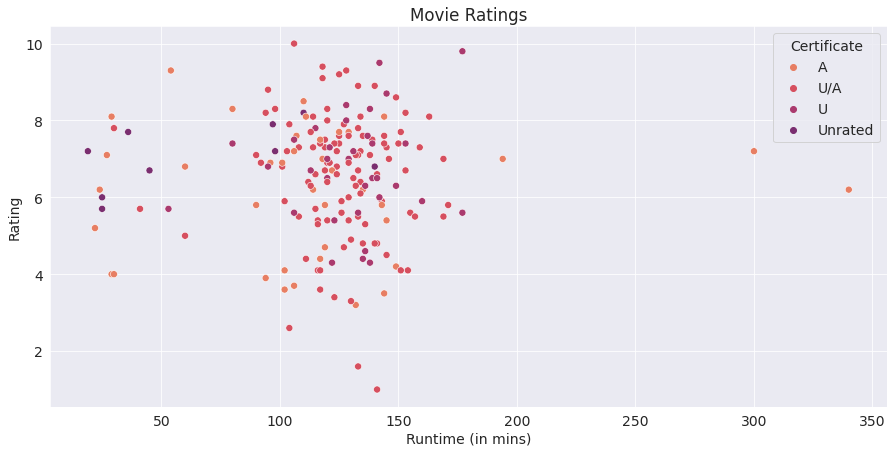

In [94]:
# Scatter plot to analyze relationship between Movie Runtime and Ratings during 2020
plt.figure(figsize=(15,7))
plt.title('Movie Ratings')

sns.scatterplot(x='Runtime (in mins)',
                y='Rating',
                hue='Certificate',
                s=50,
                palette='flare',
                data=sample_df_2020);

In [95]:
# List of movie > 180 mins (3 hours)
sample_df_2020.loc[sample_df_2020['Runtime (in mins)']>=180]

,Title,Year,Certificate,Genre,Rating,Runtime (in mins)
553,The Forgotten Army - Azaadi ke liye,2020,A,"Action, Drama, History",7.0,194
2195,Flesh,2020,A,"Crime, Thriller",6.2,340
2580,The Casino,2020,A,Thriller,7.2,300


As per Google search these are OTT Series and not just movies, part of anomaly, will remove these rows from the dataset and will again plot the scatter diagram.

***P.S.:- Further details on this anomaly of data will be discussed in Inferences and Conclusion section.***

In [96]:
# Removing rows where run time is > 180 mins
sample_df_2020_updated=sample_df_2020.drop([553,2195,2580])

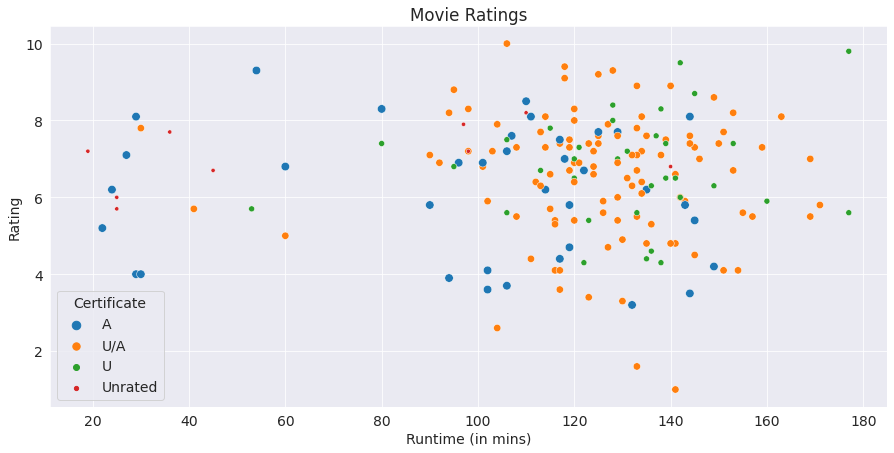

In [97]:
# Scatter plot to analyzie relationship between Movie Runtime and Ratings during 2020, analoy data removed
plt.figure(figsize=(15,7))
plt.title('Movie Ratings')

sns.scatterplot(x='Runtime (in mins)',
                y='Rating',
                hue='Certificate',
                s=50, 
                size='Certificate',
                data=sample_df_2020_updated);

### Observation 
>* There is no relatiosnhip between the lenght of a movie and its ratings.
>* Even, movies which are more than 2 hours long are rated  8/10 and movies which are just hour long are rated high as well.
>* Same goes for poor ratings there are movies which are rated below 4 even though runtime is more than 100 mins. 

#### Q5: Which is the most common Movie Genre?

In [98]:
films_df.isnull().sum().sort_values(ascending = False)

Title                0
Year                 0
Certificate          0
Genre                0
Rating               0
Runtime (in mins)    0
dtype: int64

In [99]:
text = " ".join(review for review in films_df.Genre.astype(str))

In [100]:
print ("There are {} words in the combination of all review in column Genre.".format(len(text)))

There are 133566 words in the combination of all review in column Genre.


In [101]:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

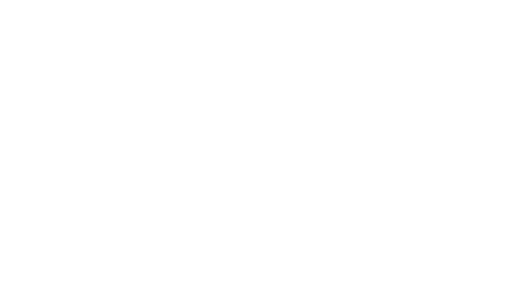

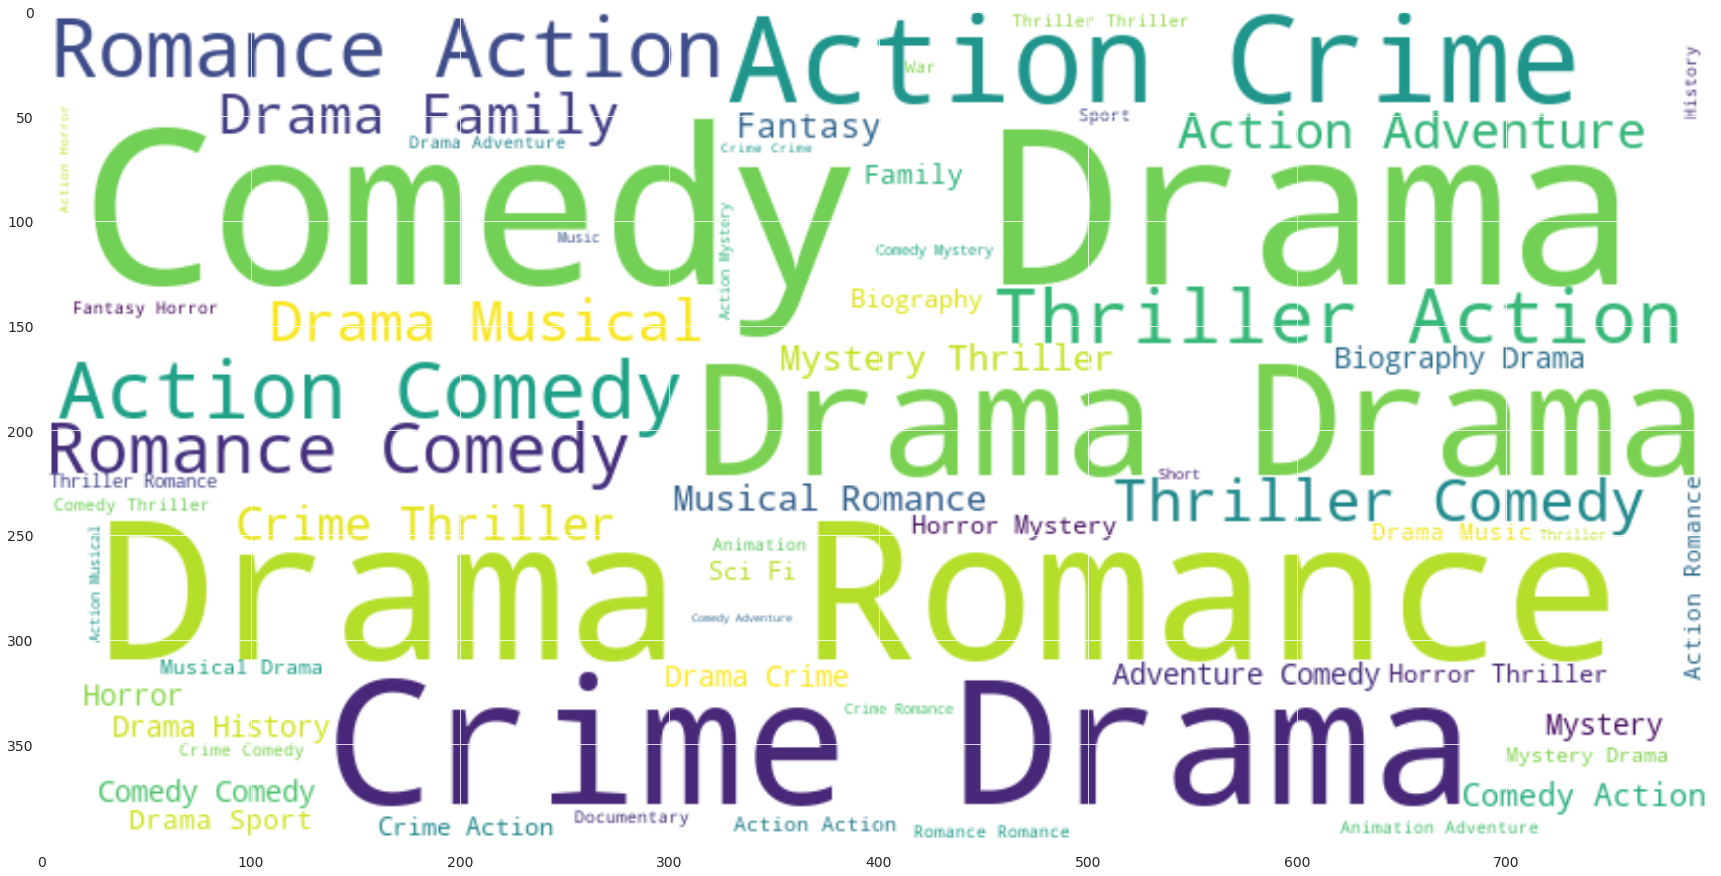

In [102]:
plt.axis("off")
plt.figure( figsize=(30,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Observation

Word cloud shows that **Comdey** as the most common genre along with **Drama** and **Romance**, tightly followed by Crime and Action.

> * This is no surprise as most of the movies we see are mix of **Drama** and **Comedy** with a pinch of **Romance** (more like a bag full of romance)
>
>
> * **Sports** and **Documentary** are among the least common Genre as per the word map.
>
>
> * Even though sports is such a major part of our entertainment (majorly cricket), still we don't have many sports related movies as the track record is not so good for them, unless those are biopics.

Let us save and upload our work to Jovian before continuing.

In [103]:
import jovian

In [104]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "himal-pant/10000-indian-movies-listed-on-imdb" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/himal-pant/10000-indian-movies-listed-on-imdb


'https://jovian.com/himal-pant/10000-indian-movies-listed-on-imdb'

## Inferences and Conclusion

### Inferences

As per the data, we believe that:

* Number of movies per year are increasing and it will keep on increasing as more and more  movies are releasing on the  OTT platforms.


* Progressively, mature themes will come to screen as the U/A certificate already covers more than 50% of movies,  A rated movies are on the rise too.


* There were very few TV shows within the dataset, all having having > 3 hours of runtime and were rated above average as per the dataset, which can imply that audiences may overlook Runtime, provided the content is engaging.

### Conclsuion

We arrived at the following conclusion while analyzing this dataset:

 * Average Runtime for a movies reduced by **30-35 mins**, since the beginning.
 * Most of the movies are **U/A** certified , which means **kids under 12** can watch such movies under **parental guidance**.
 * **Comdey, Drama, Romance, Crime** and **Action** are the the **top 5 movie genres**.
 * Average movie rating for the current decade stands at **6.6**.

In [115]:
import jovian

In [116]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "himal-pant/10000-indian-movies-listed-on-imdb" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/himal-pant/10000-indian-movies-listed-on-imdb


'https://jovian.com/himal-pant/10000-indian-movies-listed-on-imdb'

## References and Future Work

### Refrences

   1. **Kaggle:** ***https://www.kaggle.com/***
   
   
   2. **Searborn:** ***https://seaborn.pydata.org/index.html***
   
   
   3. **Geeks for Geeks:** ***https://www.geeksforgeeks.org/***
   
   
   4. **The Python Graph Gallery:** ***https://www.python-graph-gallery.com/***

    
 ### Future Work
 
   * Analyze the movies based on Languages, dataset with language as one of the column on kaggle: https://www.kaggle.com/datasets/nareshbhat/indian-moviesimdb
   
   
   * Understanding the relationship between common genres and movie ratings, and performing in-depth analysis using numpy, pandas and visualization libraries.
   
   
   * Analyze movies based on revenues, another dataset from kaggle: https://www.kaggle.com/datasets/sugandhkhobragade/bollywood-box-office-20172020
   
   
   * Region as subcategory to bifurcate the Movie based on regions.
     

In [125]:
import jovian

In [126]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "himal-pant/10000-indian-movies-listed-on-imdb" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/himal-pant/10000-indian-movies-listed-on-imdb


'https://jovian.com/himal-pant/10000-indian-movies-listed-on-imdb'